In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Loog the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed daata
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | narrabri
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 1 | half moon bay
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | vieques
Processing Record 9 of Set 1 | sai buri
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | babanusah
City not found. Skipping...
Processing Record 13 of Set 1 | tsimlyansk
Processing Record 14 of Set 1 | katherine
Processing Record 15 of Set 1 | fort nelson
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | altay
Processing Re

Processing Record 36 of Set 4 | vila
Processing Record 37 of Set 4 | sorong
Processing Record 38 of Set 4 | star dojran
Processing Record 39 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | samarai
Processing Record 43 of Set 4 | sabha
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | newark
Processing Record 46 of Set 4 | komsomolskiy
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | rungata
City not found. Skipping...
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | linjiang
Processing Record 3 of Set 5 | belvedere marittimo
Processing Record 4 of Set 5 | zaysan
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | taseyevo
Processing Record 8 of 

Processing Record 21 of Set 8 | saldanha
Processing Record 22 of Set 8 | parauna
Processing Record 23 of Set 8 | batticaloa
Processing Record 24 of Set 8 | sisophon
Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | samoded
Processing Record 27 of Set 8 | maceio
Processing Record 28 of Set 8 | hithadhoo
Processing Record 29 of Set 8 | namibe
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | acapulco
Processing Record 32 of Set 8 | saint-alexandre
Processing Record 33 of Set 8 | sao gabriel da cachoeira
Processing Record 34 of Set 8 | weiser
Processing Record 35 of Set 8 | vilani
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | eirunepe
Processing Record 38 of Set 8 | galle
Processing Record 39 of Set 8 | ninghai
Processing Record 40 of Set 8 | dunda
Processing Record 41 of Set 8 | ordubad
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | iwanai
Processing Record 44 of Set 8 | mazagao
Process

Processing Record 12 of Set 12 | ullal
Processing Record 13 of Set 12 | nara
Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | nagod
Processing Record 16 of Set 12 | ballina
Processing Record 17 of Set 12 | meridian
Processing Record 18 of Set 12 | adrar
Processing Record 19 of Set 12 | kamenka
Processing Record 20 of Set 12 | leh
Processing Record 21 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 22 of Set 12 | rudbar
Processing Record 23 of Set 12 | linda
Processing Record 24 of Set 12 | derzhavinsk
Processing Record 25 of Set 12 | kulhudhuffushi
Processing Record 26 of Set 12 | clarksdale
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | olafsvik
Processing Record 29 of Set 12 | chilca
Processing Record 30 of Set 12 | hualmay
Processing Record 31 of Set 12 | blagoyevo
Processing Record 32 of Set 12 | diriomo
Processing Record 33 of Set 12 | cooma
Processing Record 34 of Set 12 | mrirt
City not found. Skipp

In [8]:
len(city_data)

562

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-01-06 18:46:56,70.6333,147.9167,-15.05,89,96,11.12
1,Berlevag,NO,2021-01-06 18:49:03,70.8578,29.0864,28.40,74,0,11.41
2,Narrabri,AU,2021-01-06 18:51:42,-30.3167,149.7833,64.40,88,75,12.75
3,Busselton,AU,2021-01-06 18:51:43,-33.6500,115.3333,69.01,57,85,8.99
4,Half Moon Bay,US,2021-01-06 18:47:32,37.4636,-122.4286,53.01,81,1,2.89
5,Constitucion,CL,2021-01-06 18:50:57,-35.3333,-72.4167,68.29,56,7,10.76
6,Vieques,PR,2021-01-06 18:51:44,18.4250,-65.8329,82.99,69,20,9.17
7,Sai Buri,TH,2021-01-06 18:51:44,6.7013,101.6168,77.18,87,24,9.01
8,Tasiilaq,GL,2021-01-06 18:51:44,65.6145,-37.6368,21.20,44,100,2.24
9,Mar Del Plata,AR,2021-01-06 18:45:18,-38.0023,-57.5575,69.80,88,75,11.41


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

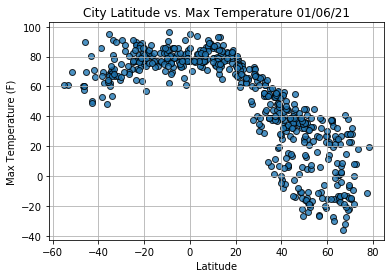

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
    max_temps,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

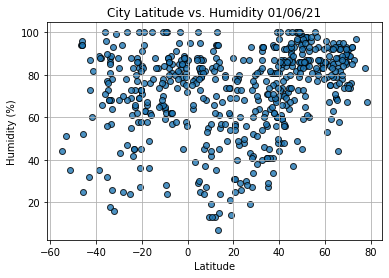

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
    humidity,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

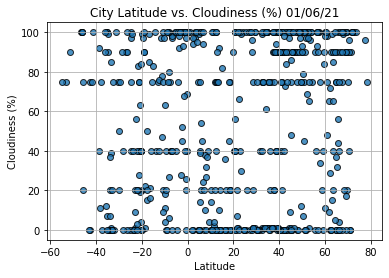

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
    cloudiness,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

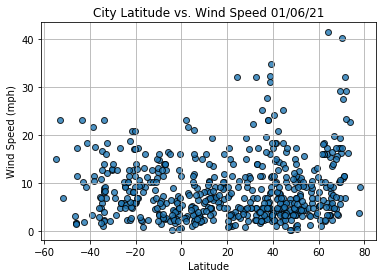

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
    wind_speed,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()